# Utilities

In [11]:
import anndata as ad
import pandas as pd
import scanpy as sc
from pathlib import Path
import plotly.express as px

In [12]:
sc.settings.set_figure_params(dpi=150, facecolor="white")

In [13]:
def replace_underscores(series):
    series = series.str.replace(r'[_-]', '<br>', regex=True)

    return series

In [14]:
def count(col_name: str, data: ad.AnnData) -> pd.Series:

    extracted = data.obs[col_name].value_counts()
    extracted.index = replace_underscores(extracted.index)

    return extracted

In [15]:
data_file = Path('../data/endometrium_all.h5ad')
data = ad.read_h5ad(data_file)

# Observations exploration

In [16]:
data.obs

,SampleID,log2p1_count,percent_mito,n_genes,DonorID,BiopsyType,Location,Binary Stage,Stage,Broad cell type,Cell type,CellCycle Phase
4861STDY7387181_AAACCTGAGGCATGGT,4861STDY7387181,13.951467,0.057320,3842,A13,Organ_Donor,endometrium_enriched,Proliferative,proliferative,Stromal,eS,S
4861STDY7387181_AAACCTGAGGGCACTA,4861STDY7387181,13.776227,0.043838,3544,A13,Organ_Donor,endometrium_enriched,Proliferative,proliferative,Stromal,eS,G1
4861STDY7387181_AAACCTGAGTGAAGTT,4861STDY7387181,12.894628,0.070791,2507,A13,Organ_Donor,endometrium_enriched,Proliferative,proliferative,Supporting,PV STEAP4,G1
4861STDY7387181_AAACCTGAGTGGGCTA,4861STDY7387181,12.329235,0.071137,1928,A13,Organ_Donor,endometrium_enriched,Proliferative,proliferative,Stromal,dS,G1
4861STDY7387181_AAACCTGCACCGAAAG,4861STDY7387181,12.171176,0.063977,1824,A13,Organ_Donor,endometrium_enriched,Proliferative,proliferative,Stromal,eS,G1
...,...,...,...,...,...,...,...,...,...,...,...,...
GSM4577315_TTTGGTTAGGATAATC,GSM4577315,15.003430,0.041133,6244,SAMN15049042,Superficial_Biopsy,endometrium_biopsy,Proliferative,proliferative,Epithelial,SOX9,G2M
GSM4577315_TTTGGTTCACTACACA,GSM4577315,14.409987,0.025634,5045,SAMN15049042,Superficial_Biopsy,endometrium_biopsy,Proliferative,proliferative,Epithelial,SOX9,G1
GSM4577315_TTTGGTTGTCCGACGT,GSM4577315,13.338180,0.079575,2911,SAMN15049042,Superficial_Biopsy,endometrium_biopsy,Proliferative,proliferative,Epithelial,SOX9,G1
GSM4577315_TTTGTTGGTTCGGCCA,GSM4577315,13.996120,0.059918,4592,SAMN15049042,Superficial_Biopsy,endometrium_biopsy,Proliferative,proliferative,Epithelial,SOX9,G2M


Each observation is one cell

In [17]:
sc.pp.calculate_qc_metrics(data, inplace=True)
data.obs

,SampleID,log2p1_count,percent_mito,n_genes,DonorID,BiopsyType,Location,Binary Stage,Stage,Broad cell type,Cell type,CellCycle Phase,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes
4861STDY7387181_AAACCTGAGGCATGGT,4861STDY7387181,13.951467,0.057320,3842,A13,Organ_Donor,endometrium_enriched,Proliferative,proliferative,Stromal,eS,S,3842,8.254009,6091.234375,8.714770,5.357813,9.937850,16.461146,30.329796
4861STDY7387181_AAACCTGAGGGCACTA,4861STDY7387181,13.776227,0.043838,3544,A13,Organ_Donor,endometrium_enriched,Proliferative,proliferative,Stromal,eS,G1,3544,8.173293,5577.414551,8.626660,5.598043,10.338274,17.573845,32.288982
4861STDY7387181_AAACCTGAGTGAAGTT,4861STDY7387181,12.894628,0.070791,2507,A13,Organ_Donor,endometrium_enriched,Proliferative,proliferative,Supporting,PV STEAP4,G1,2507,7.827241,3600.496338,8.189105,7.620736,13.651716,22.025208,38.717518
4861STDY7387181_AAACCTGAGTGGGCTA,4861STDY7387181,12.329235,0.071137,1928,A13,Organ_Donor,endometrium_enriched,Proliferative,proliferative,Stromal,dS,G1,1928,7.564757,2623.698730,7.872721,9.540449,16.961205,26.312600,45.305457
4861STDY7387181_AAACCTGCACCGAAAG,4861STDY7387181,12.171176,0.063977,1824,A13,Organ_Donor,endometrium_enriched,Proliferative,proliferative,Stromal,eS,G1,1824,7.509335,2516.914551,7.831186,8.841314,15.683807,26.020643,46.326791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM4577315_TTTGGTTAGGATAATC,GSM4577315,15.003430,0.041133,6244,SAMN15049042,Superficial_Biopsy,endometrium_biopsy,Proliferative,proliferative,Epithelial,SOX9,G2M,6244,8.739536,11652.254883,9.363340,3.015491,5.596612,9.970052,20.187622
GSM4577315_TTTGGTTCACTACACA,GSM4577315,14.409987,0.025634,5045,SAMN15049042,Superficial_Biopsy,endometrium_biopsy,Proliferative,proliferative,Epithelial,SOX9,G1,5045,8.526351,8743.480469,9.076178,3.687187,6.861096,12.209780,24.024767
GSM4577315_TTTGGTTGTCCGACGT,GSM4577315,13.338180,0.079575,2911,SAMN15049042,Superficial_Biopsy,endometrium_biopsy,Proliferative,proliferative,Epithelial,SOX9,G1,2911,7.976595,4476.934570,8.406918,6.637291,11.842148,19.644060,36.152132
GSM4577315_TTTGTTGGTTCGGCCA,GSM4577315,13.996120,0.059918,4592,SAMN15049042,Superficial_Biopsy,endometrium_biopsy,Proliferative,proliferative,Epithelial,SOX9,G2M,4592,8.432289,7388.960938,8.907878,4.159953,7.457813,12.898737,25.078706


## Samples

In [18]:
data.obs['SampleID'].nunique()

21

In [19]:
count('SampleID', data)

SampleID
GSM4577309            20816
4861STDY7771123       12665
GSM4577310             7095
GSM4577308             6737
4861STDY7387183        6344
4861STDY7387181        6072
4861STDY7387182        6007
4861STDY7771115        4335
MRC<br>Endo8625698     4310
GSM4577312             3384
GSM4577314             3069
GSM4577313             3002
GSM4577311             2945
MRC<br>Endo8715416     2415
MRC<br>Endo8625699     2368
GSM4577306             2025
GSM4577315             1958
GSM4577307             1870
MRC<br>Endo8712032     1408
MRC<br>Endo8712024      879
MRC<br>Endo8715415      603
Name: count, dtype: int64

In [20]:
si_di = data.obs.groupby(['SampleID', 'DonorID'], observed=False).size()
si_di = si_di.reset_index(name='cells')

plt = px.bar(si_di,
             x='DonorID',
             y='cells',
             color = 'SampleID',
             title='Samples per donor',
             width=600,
             height=600,
             category_orders={'BiopsyType':['Superficial<br>Biopsy', 'Organ<br>Donor']},
             labels={'BiopsyType':'Biopsy type'},
             color_discrete_sequence=px.colors.qualitative.Alphabet)

plt.update_layout(font={'size':16},
                  showlegend=False)
plt

## Donors

In [21]:
data.obs['DonorID'].nunique()

15

In [22]:
count('DonorID', data)

DonorID
SAMN15049048    20816
A13             18423
A30             17000
SAMN15049047     7095
SAMN15049049     6737
E1               6678
SAMN15049045     3384
SAMN15049043     3069
E3               3018
SAMN15049044     3002
SAMN15049046     2945
E2               2287
SAMN15049051     2025
SAMN15049042     1958
SAMN15049050     1870
Name: count, dtype: int64

## Biopsy type

In [23]:
biopsy_type = count('BiopsyType', data)

bt_plt = px.bar(biopsy_type,
                color=biopsy_type.index,
                title='Number of cells by biopsy type',
                width=400,
                height=400,
                labels={'BiopsyType':'Biopsy type',
                        'value':'cells'})

bt_plt.update_layout(showlegend=False,
                     font={'size':14})
bt_plt

## Biopsy type and Donor ID

In [40]:
bt_dr = data.obs.groupby(['BiopsyType', 'DonorID'], observed=False).size()
bt_dr = bt_dr.reset_index(name='cells')
bt_dr['BiopsyType'] = replace_underscores(bt_dr['BiopsyType'])

plt = px.bar(bt_dr,
             x='BiopsyType',
             y='cells',
             color = 'DonorID',
             title='Donors per biopsy type',
             width=400,
             height=600,
             category_orders={'BiopsyType':['Superficial<br>Biopsy', 'Organ<br>Donor']},
             labels={'BiopsyType':'Biopsy type'},
             color_discrete_sequence=px.colors.qualitative.Alphabet[4:])

plt.update_layout(font={'size':16},
                  showlegend=False)
plt

## Location

In [25]:
count('Location', data)

Location
endometrium<br>biopsy      64884
endometrium<br>enriched    29079
myometrium                  6344
Name: count, dtype: int64

## Binary stage

In [26]:
count('Binary Stage', data)

Binary Stage
Secretory        75038
Proliferative    25269
Name: count, dtype: int64

## Stage

In [ ]:
stage = count('Stage', data)
menstrual_cycle= ['proliferative', 'early<br>secretory', 'early<br>mid<br>secretory', 'mid<br>secretory', 'late<br>secretory']
stage = stage.reindex(menstrual_cycle)

plt = px.bar(stage,
             color=['p', 's', 's', 's', 's'],
             title='Number of cells in stages of a menstrual cycle',
             width=800,
             height=400,
             labels={'value':'cells'})

plt.update_layout(showlegend=False,
                  font={'size':16})
plt

## Broad cell type

In [28]:
cell_type = count('Broad cell type', data)

plt = px.bar(cell_type,
             color=cell_type.index,
             title='Number of cells by type',
             width=800,
             height=400,
             labels={'value':'cells'})

plt.update_layout(showlegend=False,
                  font={'size':16})
plt

## Biopsy type vs cell type

In [29]:
bt_ct = data.obs.groupby(['BiopsyType','Broad cell type'], observed=False).size()
bt_ct = bt_ct.reset_index(name='cells')
bt_ct['BiopsyType'] = replace_underscores(bt_ct['BiopsyType'])
bt_ct['Percentage'] = bt_ct.groupby('BiopsyType', observed=False)['cells'].transform(lambda x: (100 * x / x.sum()))
bt_ct

,BiopsyType,Broad cell type,cells,Percentage
0,Organ<br>Donor,Epithelial,1856,5.239534
1,Organ<br>Donor,Endothelial,5771,16.291675
2,Organ<br>Donor,Immune,663,1.871665
3,Organ<br>Donor,Supporting,15143,42.749061
4,Organ<br>Donor,Stromal,11637,32.851537
5,Organ<br>Donor,Excluded,353,0.996528
6,Superficial<br>Biopsy,Epithelial,32331,49.828925
7,Superficial<br>Biopsy,Endothelial,1806,2.783429
8,Superficial<br>Biopsy,Immune,2409,3.712780
9,Superficial<br>Biopsy,Supporting,1478,2.277911


In [41]:
plt = px.bar(bt_ct,
             x='BiopsyType',
             y='Percentage',
             color = 'Broad cell type',
             title='Cell types in biopsy types',
             width=500,
             height=600,
             category_orders={'BiopsyType':['Superficial<br>Biopsy', 'Organ<br>Donor']},
             labels={'Percentage':'cells [%]',
                     'BiopsyType':'Biopsy type',
                     'Broad cell type':'Cell type'})

plt.update_layout(font={'size':16})
plt

## Cell type

In [31]:
count('Cell type', data)

Cell type
dS                    24436
Lumenal               14252
Glandular             13100
eS                    12675
uSMC                   7746
Endothelial ACKR1      7188
SOX9                   3646
PV MYH11               3414
PV STEAP4              3345
Ciliated               3189
Other                  2923
Lymphoid               2311
Fibroblast C7           932
Myeloid                 761
Endothelial SEMA3G      389
Name: count, dtype: int64

## Cell cycle phase

In [32]:
count('CellCycle Phase', data)

CellCycle Phase
G1     94213
S       3667
G2M     2427
Name: count, dtype: int64

# Variable exploration

In [33]:
len(data.var_names)

28614

In [34]:
sc.pp.calculate_qc_metrics(data, inplace=True, log1p=True)
data.var

,gene_ids,n_cells,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts
RP11-34P13.3,ENSG00000243485,87,76,0.000764,0.000763,99.924233,76.584961,4.351374
FAM138A,ENSG00000237613,17,14,0.000140,0.000140,99.986043,14.000000,2.708050
RP11-34P13.7,ENSG00000238009,209,172,0.001715,0.001713,99.828526,172.000000,5.153292
RP11-34P13.8,ENSG00000239945,17,15,0.000150,0.000150,99.985046,15.000000,2.772589
RP11-34P13.9,ENSG00000241599,11,5,0.000050,0.000050,99.995015,5.000000,1.791759
...,...,...,...,...,...,...,...,...
AC007325.2,ENSG00000277196,2321,1861,0.019564,0.019375,98.144696,1962.413208,7.582440
AL354822.1,ENSG00000278384,3360,2523,0.027353,0.026986,97.484722,2743.710938,7.917431
AC023491.2,ENSG00000278633,6,5,0.000050,0.000050,99.995015,5.000000,1.791759
AC004556.1,ENSG00000276345,22107,18806,0.216952,0.196349,81.251558,21762.740234,9.988001


# Gene counts

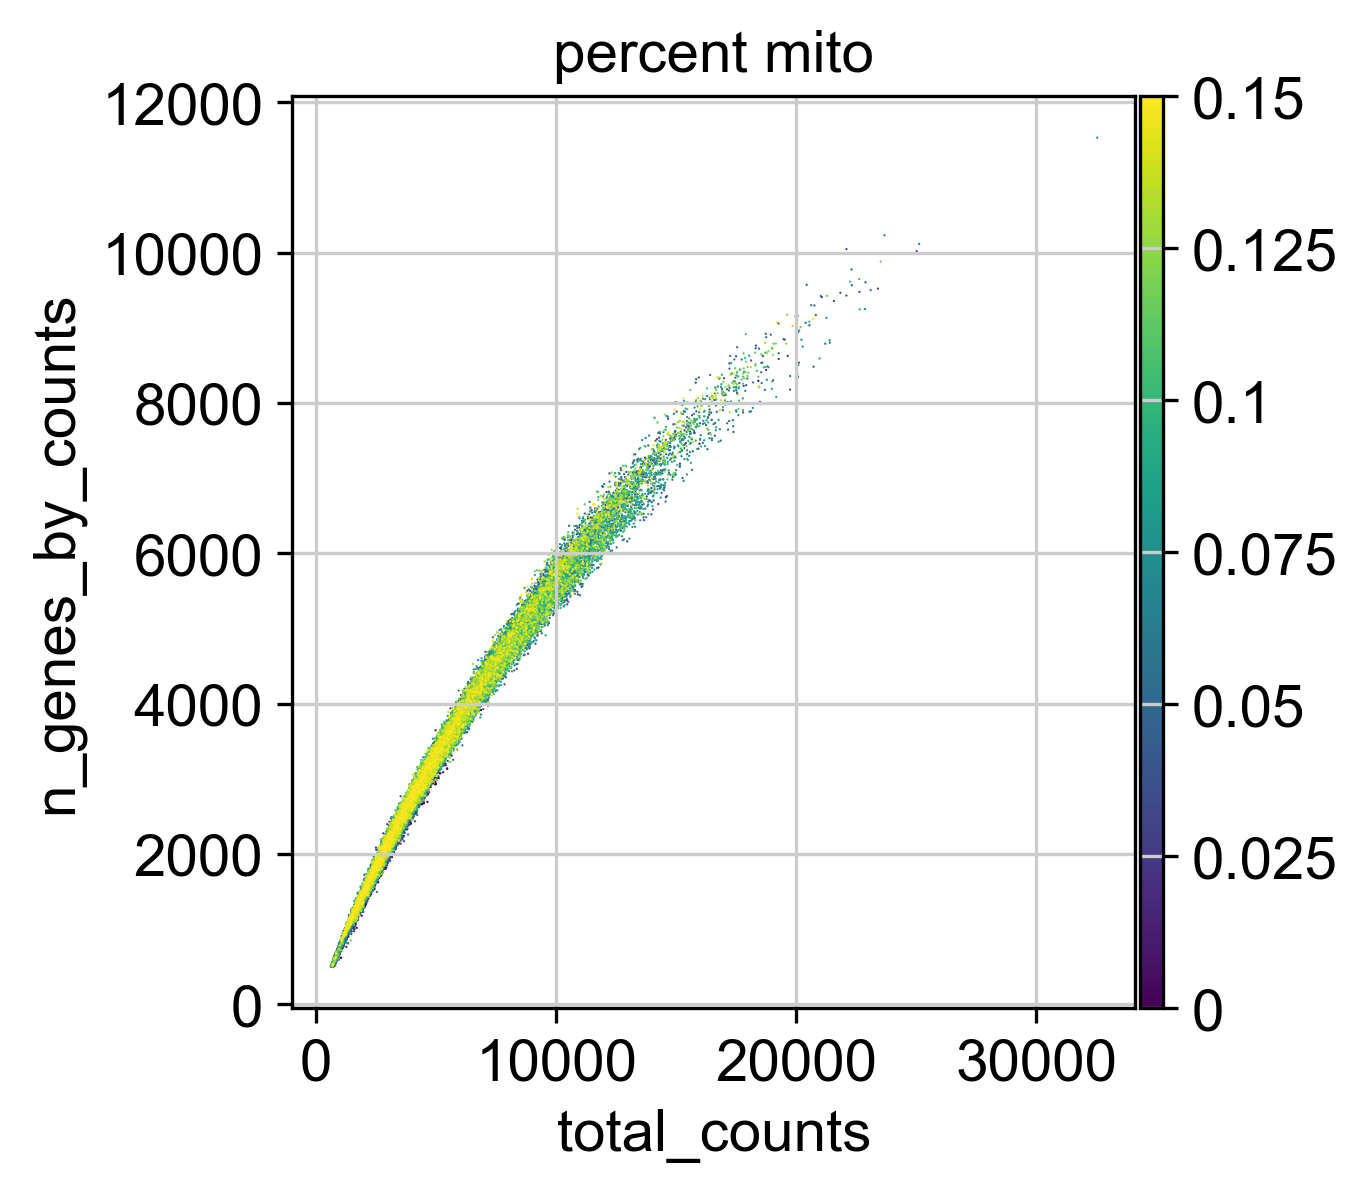

In [39]:
sc.pl.scatter(data, 'total_counts', 'n_genes_by_counts', color='percent_mito', save='_mito.png')

There is no need for filtering based on mitochondrial gene expression percentage.

# 